In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data[:, [0,1]]   # 꽃잎 길이, 너비
y = iris.target

In [3]:
# 1. 유클리드 거리 함수
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# 2. KNN 예측 함수
def knn_predict(x, X_train, y_train, k):
    distances = [euclidean_distance(x, xi) for xi in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    
    # 다수결
    labels, counts = np.unique(k_labels, return_counts=True)
    return labels[np.argmax(counts)]

# 3. 정확도 평가 함수
def compute_accuracy(X_val, y_val, X_train, y_train, k):
    correct = 0
    for x, y in zip(X_val, y_val):
        pred = knn_predict(x, X_train, y_train, k)
        if pred == y:
            correct += 1
    return correct / len(y_val)

In [ ]:
# 5. 훈련/검증 데이터 분할
np.random.seed(45)
indices = np.random.permutation(len(X))
split = int(0.7 * len(X))

train_idx = indices[:split]
val_idx = indices[split:]

X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

# 6. k값 최적화
k_candidates = range(1, 11)
best_k = None
best_acc = 0.0

print("전체 정확도:")
for k in k_candidates:
    acc = compute_accuracy(X_val, y_val, X_train, y_train, k)
    print(f"k = {k} -> 정확도: {acc:.2f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"\n✅ 최적의 k값은: {best_k} (정확도: {best_acc:.2f})")

전체 정확도:
k = 1 -> 정확도: 0.71
k = 2 -> 정확도: 0.62
k = 3 -> 정확도: 0.60
k = 4 -> 정확도: 0.62
k = 5 -> 정확도: 0.69
k = 6 -> 정확도: 0.76
k = 7 -> 정확도: 0.76
k = 8 -> 정확도: 0.73
k = 9 -> 정확도: 0.78
k = 10 -> 정확도: 0.76

✅ 최적의 k값은: 9 (정확도: 0.78)


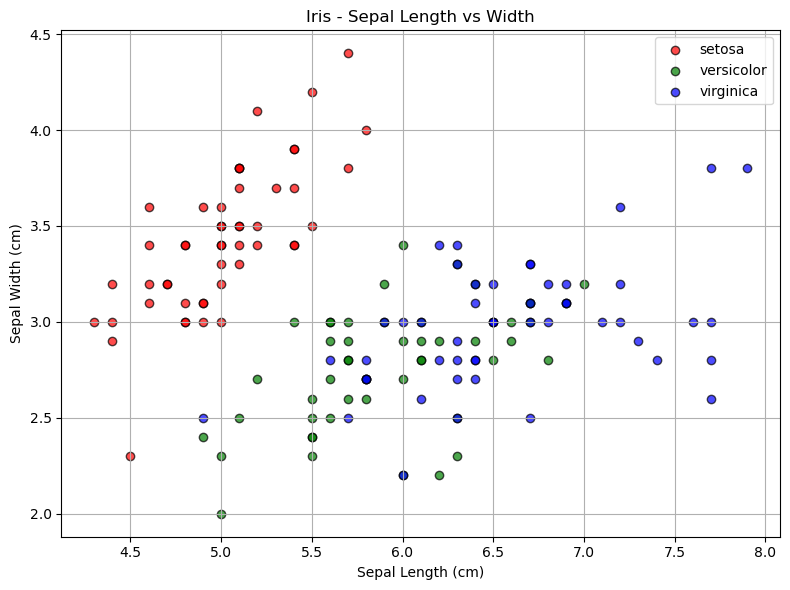

In [5]:
# 데이터 준비
iris = load_iris()
x = iris.data[:150, [0,1]]
y = iris.target[:150]

df = pd.DataFrame(x, columns=["Sepal Length", "Sepal Width"])
df["Label"] = y

# 시각화
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = iris.target_names  # ['setosa', 'versicolor', 'virginica']

for i in range(3):
    subset = df[df["Label"] == i]
    plt.scatter(
        subset["Sepal Length"],
        subset["Sepal Width"],
        color=colors[i],
        label=labels[i],
        alpha=0.7,
        edgecolor='k'
    )

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris - Sepal Length vs Width")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
